In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
!pip install tslearn
from tslearn.metrics import dtw
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 7.4 MB/s eta 0:00:00


In [4]:
# Load the dataset
data = pd.read_csv('/content/app.csv', sep=';')
data['time'] = pd.to_datetime(data['time'], format='%d.%m.%y %H:%M')
data.head()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      169 non-null    datetime64[ns]
 1   users     169 non-null    int64         
 2   sessions  169 non-null    int64         
 3   newusers  169 non-null    int64         
 4   crashes   169 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 6.7 KB


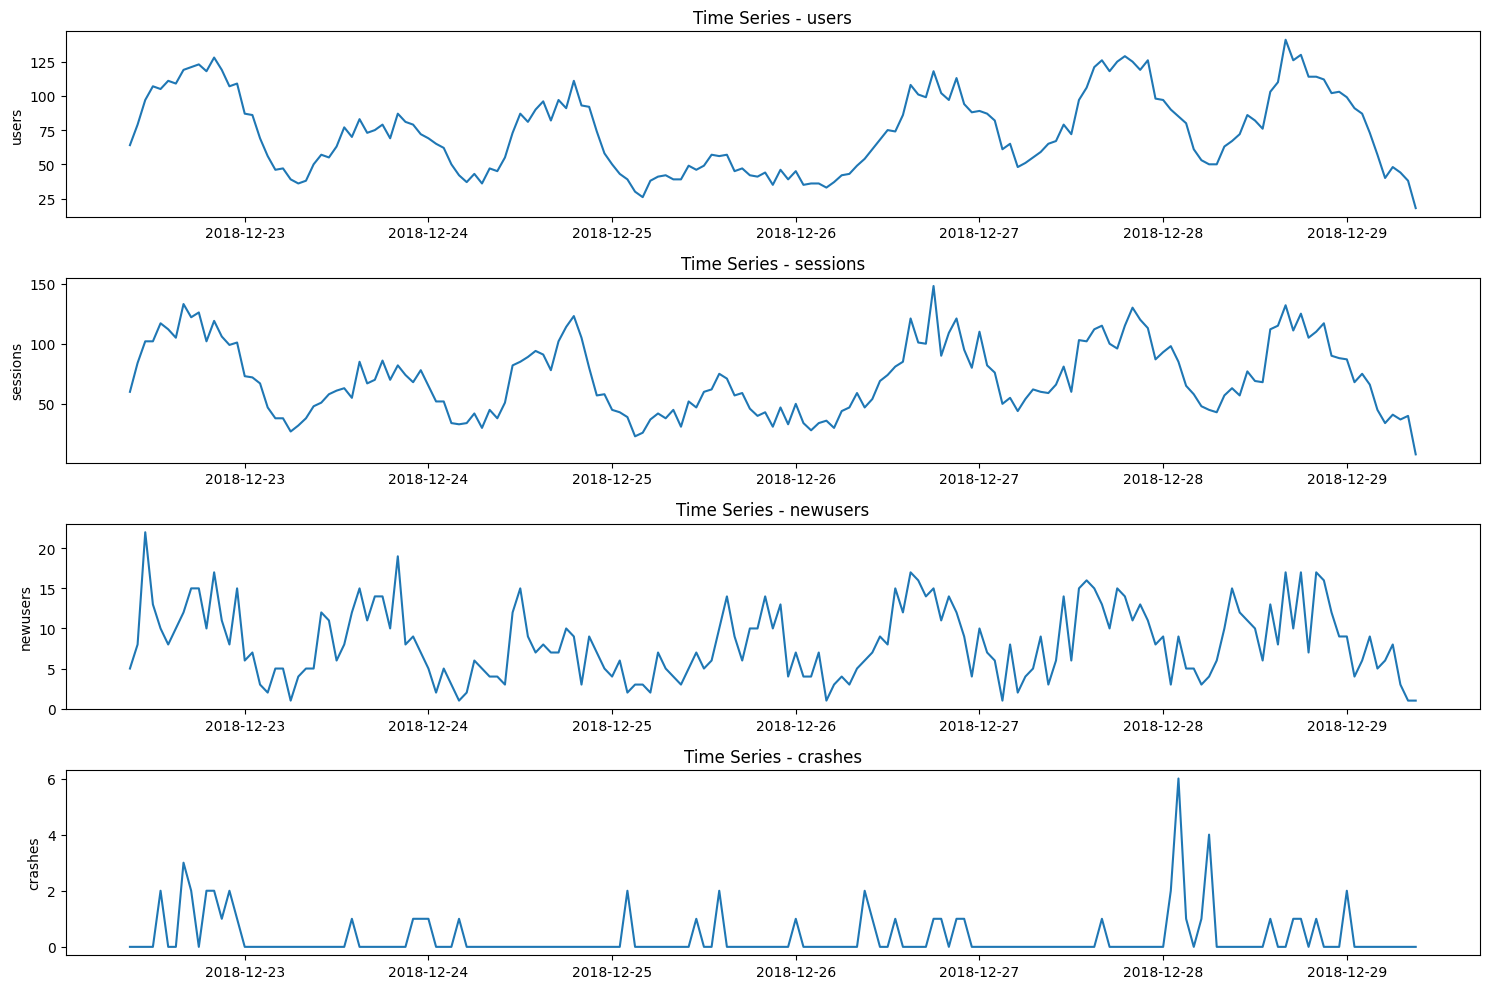

In [5]:
# EDA: Plotting the time series data and distributions
plt.figure(figsize=(15, 10))
columns = ['users', 'sessions', 'newusers', 'crashes']
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i+1)
    plt.plot(data['time'], data[col], label=col)
    plt.title(f'Time Series - {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

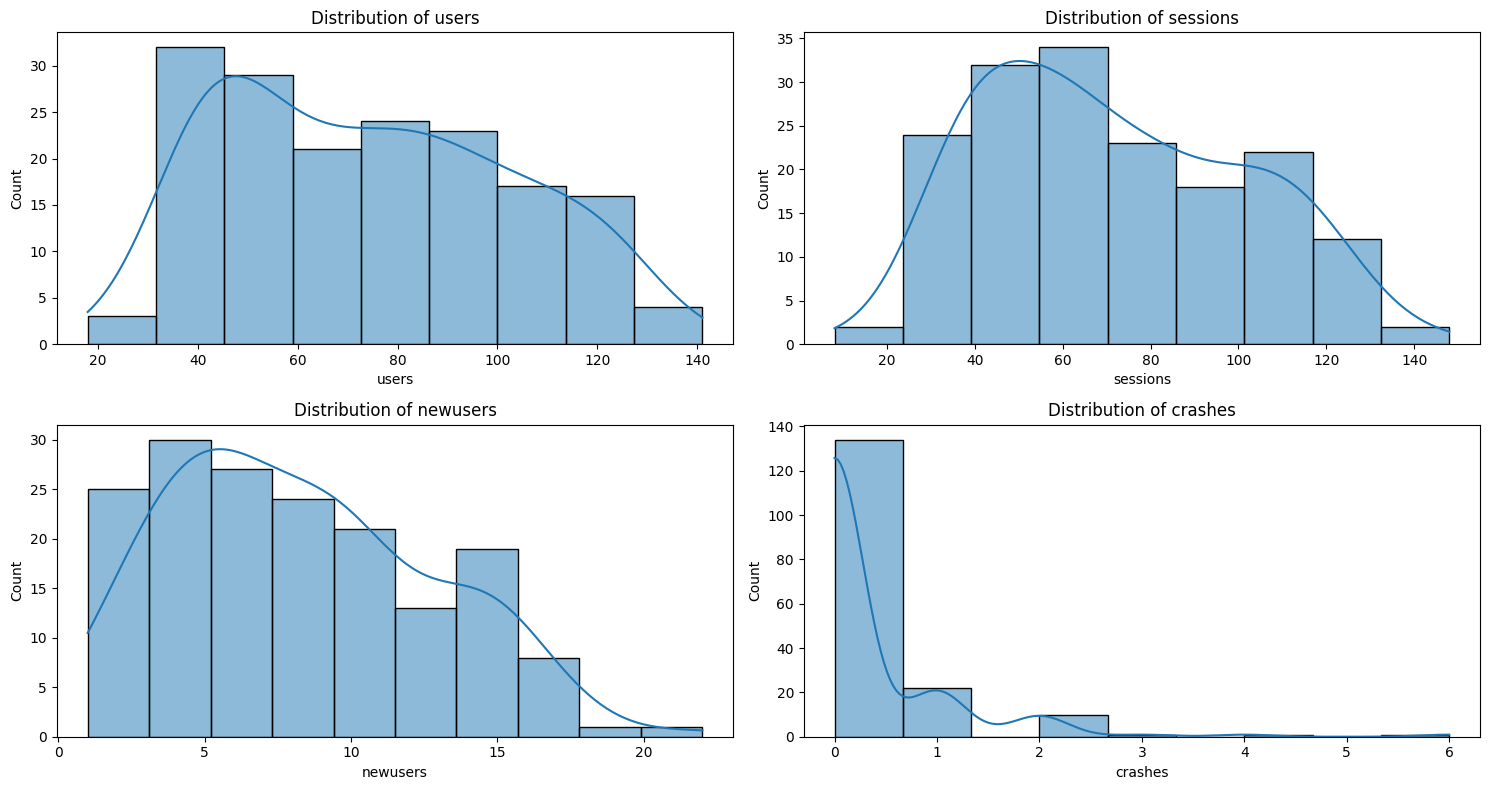

In [6]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [7]:
# Data Preprocessing: Normalization and Feature Engineering
scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[columns] = scaler.fit_transform(data[columns])
data_scaled['hour'] = data_scaled['time'].dt.hour
data_scaled['day_of_week'] = data_scaled['time'].dt.dayofweek

In [9]:
import numpy as np

# Create an empty matrix to store the DTW distances
n_series = len(time_series_data)
dtw_distance_matrix = np.zeros((n_series, n_series))


In [10]:
# Compute the DTW distance for each pair of time series
for i in range(n_series):
    for j in range(i+1, n_series):
        distance = dtw(time_series_data[i], time_series_data[j])
        dtw_distance_matrix[i, j] = distance
        dtw_distance_matrix[j, i] = distance

<ipython-input-11-a55dae1b199f>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dtw_distance_matrix, 'ward')


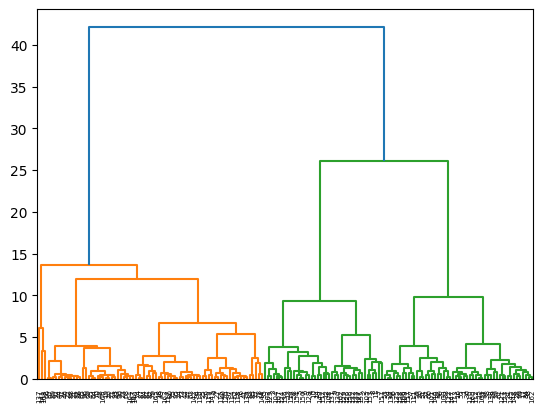

In [11]:
# Now you can proceed with the hierarchical clustering
Z = linkage(dtw_distance_matrix, 'ward')
dendrogram(Z)
plt.show()

In [13]:
# Choosing the number of clusters (this needs to be set manually based on the dendrogram)
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion='maxclust')
data_scaled['cluster'] = clusters

In [14]:
# Cluster Analysis
print(data_scaled.groupby('cluster').mean())

            users  sessions  newusers   crashes       hour  day_of_week
cluster                                                                
1        0.242213  0.268460  0.213358  0.045455   7.987013     2.467532
2        0.773349  0.738850  0.570267  0.105691  16.658537     3.756098
3        0.525426  0.503922  0.371615  0.026144  12.607843     3.235294


<ipython-input-14-81531e1a12f2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data_scaled.groupby('cluster').mean())


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled[columns])

In [16]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
pca_df['cluster'] = data_scaled['cluster']

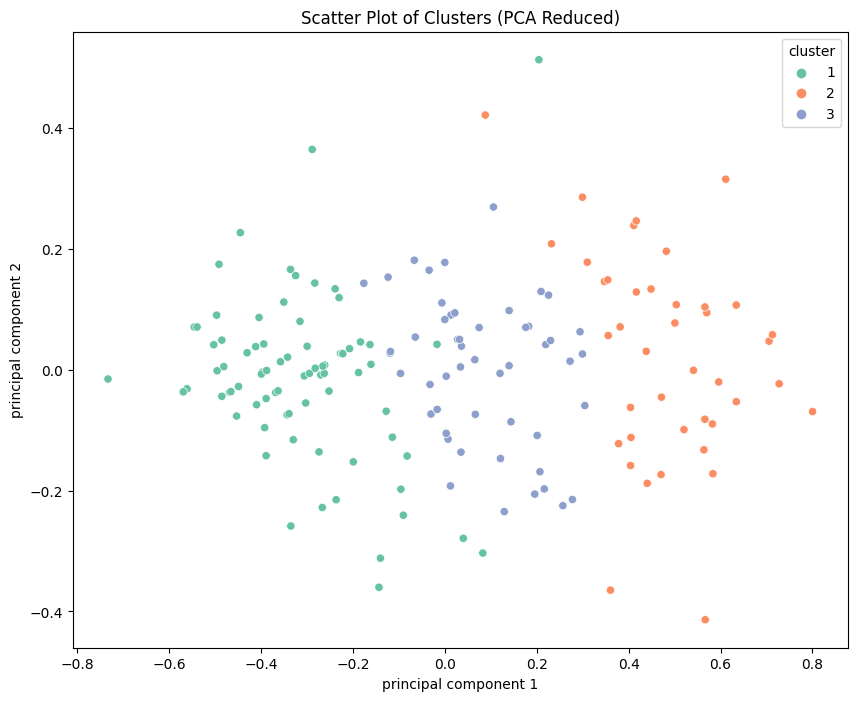

In [17]:
# Plotting the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=pca_df, palette="Set2")
plt.title('Scatter Plot of Clusters (PCA Reduced)')
plt.show()